In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

In [12]:
data = yf.download('AAPL', start='2010-01-01', end='2024-07-19')

[*********************100%%**********************]  1 of 1 completed


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create a function to prepare the data for LSTM

In [15]:
def prepare_data(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = prepare_data(scaled_data, time_step)

# Split into train and test sets

In [16]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to be [samples, time steps, features]

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model

In [19]:
model = Sequential()
model.add(Input(shape=(time_step, 1))) 
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

2878/2878 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 7.5236e-04


In [22]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [23]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [25]:
train = data[:train_size + time_step]
valid = data[train_size + time_step:]
valid = valid[:len(test_predict)] 
valid['Predictions'] = test_predict

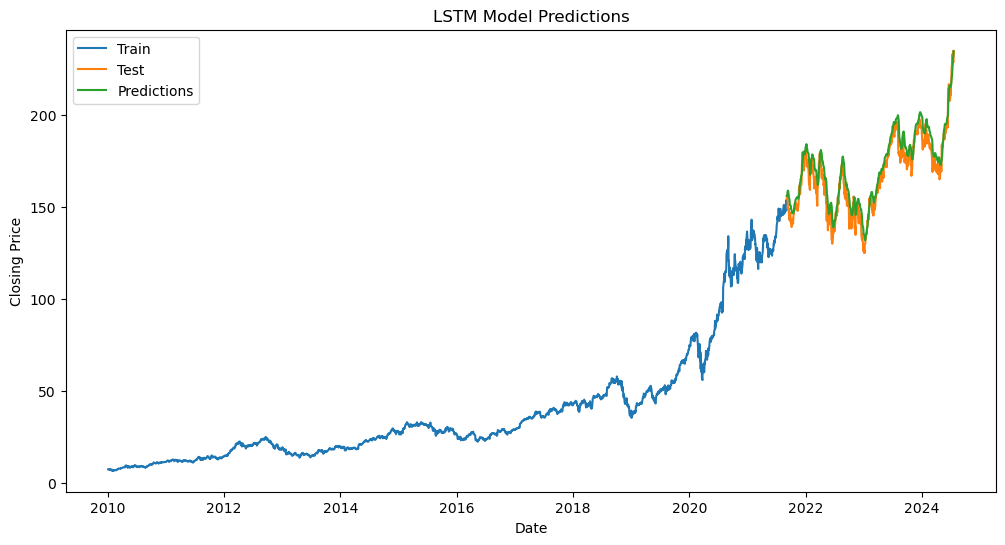

In [26]:
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Test', 'Predictions'])
plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Tree-based Models

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [29]:
X_train_2d = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_2d = X_test.reshape(X_test.shape[0], X_test.shape[1])

In [30]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_2d, y_train)

DecisionTreeRegressor()

In [31]:
tree_predictions = tree_model.predict(X_test_2d)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_predictions))

In [32]:
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train_2d, y_train)

RandomForestRegressor()

In [33]:
forest_predictions = forest_model.predict(X_test_2d)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_predictions))

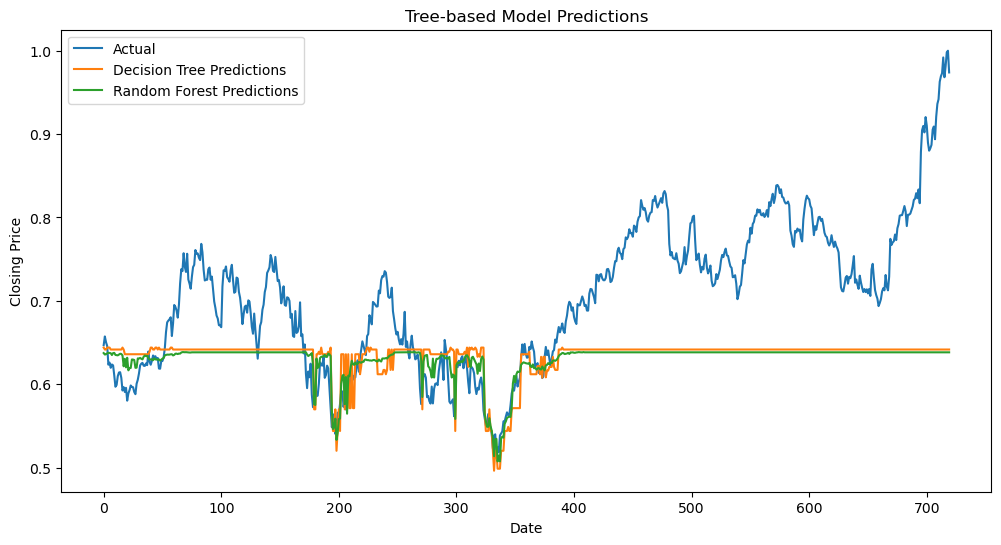

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(tree_predictions, label='Decision Tree Predictions')
plt.plot(forest_predictions, label='Random Forest Predictions')
plt.title('Tree-based Model Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [35]:
print('Decision Tree RMSE:', tree_rmse)
print('Random Forest RMSE:', forest_rmse)

Decision Tree RMSE: 0.10590659755114715
Random Forest RMSE: 0.1074065539223193
